In [1]:
#!pip install torch torchvision torchaudio

In [2]:
#!cd yolov5 & pip install -r requirements.txt

<h2>Import dependencies</h2>

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [2]:
#load model
model =  torch.hub.load('ultralytics/yolov5','yolov5s') #download pretrained model from yolov5
model

Using cache found in C:\Users\Kridbhume Chammanard/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-11-2 Python-3.10.8 torch-1.12.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [5]:
#make detections
img = "https://ultralytics.com/images/zidane.jpg"
results = model(img) #pass through image we wnat to make detections on
results.print() #prints result from model but doesnt render

image 1/1: 720x1280 2 persons, 2 ties
Speed: 1148.3ms pre-process, 184.7ms inference, 19.7ms NMS per image at shape (1, 3, 384, 640)


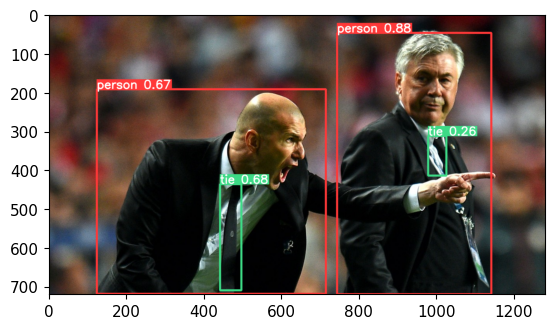

In [6]:
%matplotlib inline
plt.imshow(np.squeeze(results.render())) 
plt.show()

In [7]:
results.xyxy #coordinates for model
#results.show() 
results.render() #return the image we did detections on
np.array(results.render()).shape #incasulated in another set of arrays
np.squeeze(results.render()).shape #removes subsets with dimensions 1

(720, 1280, 3)

<h2>Real Time Detections</h2>

cap = cv2.VideoCapture(0)
while True:
    ret,frame = cap.read()

    #pass frame through model
    results = model(frame)

    cv2.imshow("YOLO",np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

<h2>Train custom model (custom labels) </h2>

In [8]:
import uuid #create unique identifier (used to name images)
import os #leverage file paths (make easier to manage)
import time #take break between each image

In [9]:
IMAGES_PATH = os.path.join('data','images') #where image data will be saved .join(top folder, sub folder)
labels = ['awake','drowsy']
number_imgs = 20 #number of images we want to collect

In [10]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg')) #create name for each image

data\images\awake.1497a48a-5a6a-11ed-89e9-4c796e2131e3.jpg


<h3> Use this code for changing file names <h3>

In [11]:
# os.chdir('C:/Users/Kridbhume Chammanard/Desktop/OpenCV/Projects/data/screen cleaner')
# for count, f in enumerate(os.listdir()):
#     f_name, f_ext = os.path.splitext(f)
#     f_name = "screen cleaner" + '.' + str(uuid.uuid1())
 
#     new_name = f'{f_name}{f_ext}'
#     os.rename(f, new_name)



cap = cv2.VideoCapture(0)
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5) #delay for 5 seconds between transitions of labels

    #loop through images
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))

        ret,frame = cap.read()

        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg') #create name for each image
        cv2.imwrite(imgname, frame) #writes out image to file
        cv2.imshow("Image Collection",frame)
        time.sleep(1)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()


In [12]:
#!git clone https://github.com/heartexlabs/labelImg

In [13]:
# !pip install pyqt5 lxml --upgrade
# !cd labelImg && "C:\Users\Kridbhume Chammanard\AppData\Roaming\Python\Python310\Scripts\pyrcc5.exe" -o libs/resources.py resources.qrc

In [14]:
#!cd yolov5 && python train.py --img 320 --batch 16 --epochs 70 --data dataset.yml --weights yolov5s.pt --workers 2
#each time you run a new training run a new experiment will be created in the runs/trains folder

<h2> Load Custom Model </h2>

In [15]:
model =  torch.hub.load('ultralytics/yolov5','custom', path = 'yolov5/runs/train/exp4/weights/last.pt', force_reload = True) #load new model

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Kridbhume Chammanard/.cache\torch\hub\master.zip
YOLOv5  2022-11-2 Python-3.10.8 torch-1.12.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [16]:
img = os.path.join('data','images','awake.d7d61fcf-545f-11ed-84f9-4c796e2131e3.jpg')

In [17]:
results = model(img)
results.print()

image 1/1: 480x640 1 awake
Speed: 10.4ms pre-process, 218.7ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)


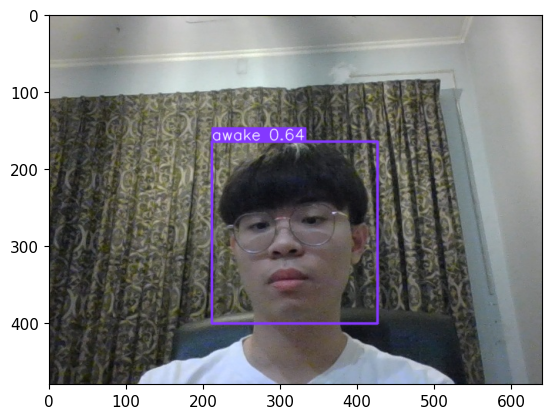

In [18]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [19]:
cap = cv2.VideoCapture(0)
while True:
    ret,frame = cap.read()

    #pass frame through model
    results = model(frame)

    cv2.imshow("YOLO",np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

<h3> Screen Cleaner Test </h3>

In [20]:
model2 = torch.hub.load('ultralytics/yolov5','custom', path = 'yolov5/runs/train/exp5/weights/last.pt', force_reload = True) #load new model


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Kridbhume Chammanard/.cache\torch\hub\master.zip
YOLOv5  2022-11-2 Python-3.10.8 torch-1.12.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7058671 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [21]:
cap = cv2.VideoCapture("screencleanervdo.mp4")
cap.set(3,450)
cap.set(4,450)

while True:
    ret,frame = cap.read()
    cv2.resize(frame, (450,450))
    #pass frame through model
    results = model2(frame)

    cv2.imshow("YOLO",cv2.resize(np.squeeze(results.render()),(450,820)))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()